In [1]:
from core import Spectrum 

# 1 Spectrum-Objekt erstellen und Daten laden

In [2]:
spectrum_1 = Spectrum() # Spectrum object kreieren
spectrum_1.load_spectrum('ge_co_spec.txt')
# Alternativ: direkt mit Spectrum('ge_co_spec.txt') 

Spectrum loaded from ge_co_spec.txt using delimiter=' '.


Erste paar Werte schauen:

In [3]:
spectrum_1

<Spectrum: 16383 points>
    x  y
0   1  0
1   2  0
2   3  0
3   4  0
4   5  0
5   6  0
6   7  0
7   8  0
8   9  0
9  10  0

2. Schnelles Plotten

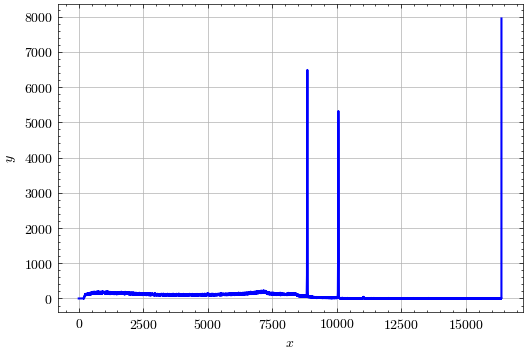

In [4]:
spectrum_1.plot()

Jetzt vor dem Fitten Peaks besser anschauen mit x_min, x_max 

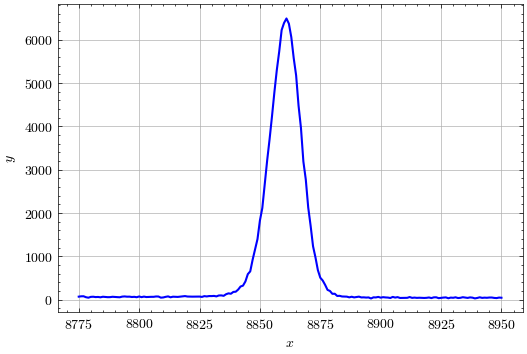

In [5]:
spectrum_1.plot(x_min=8775, x_max=8950)

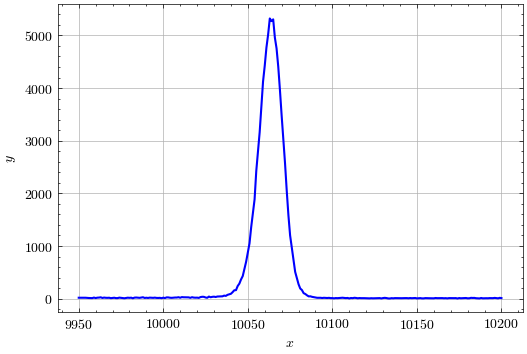

In [6]:
spectrum_1.plot(x_min=9950, x_max=10200)

Fitten

In [7]:
spectrum_1.fit_peaks(
    x_min=8775,      
    x_max=8950,      
    peak_type='gaussian',
    n_peaks=1,
    bg_type='constant',
    bg_coeffs=[0], # initial background coefficients
    initial_params=[6000, 8860, 100]  # Initial parameters for the fit
)

c:\Users\bruno\spectrum_analyzer\src\spectrum_analyzer\core.py:227: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.fitted_peaks = pd.concat([self.fitted_peaks, df], ignore_index=True)


  peak_id      type  x_min  x_max       bg0     d_bg0          amp          cen       wid      d_amp     d_cen     d_wid
0       1  gaussian   8775   8950  6.530299  0.035701  6349.297352  8860.598471  6.530299  30.061061  0.035701  0.035701

In [ ]:
spectrum_1.fit_peaks(
    x_min=10000,      
    x_max=11000,      
    peak_type='gaussian',
    n_peaks=1,
    bg_type='constant',
    bg_coeffs=[0], # initial background coefficients
    initial_params=[5000, 10500, 100]  # Initial parameters for the fit
)


  peak_id      type  x_min  x_max       bg0     d_bg0          amp           cen       wid    d_amp     d_cen     d_wid
0       2  gaussian  10000  11000  6.901578  0.012409  5247.014886  10063.678612  6.901578  8.17031  0.012409  0.012409

Fits zeigen

In [8]:
# Sigma und Gamma spalten nur notwendig bei Voigt Peaks

In [9]:
spectrum_1.fitted_peaks

,peak_id,type,amp,cen,wid,sigma,gamma,x_min,x_max,bg0,d_bg0,d_amp,d_cen,d_wid
0,1,gaussian,6349.297352,8860.598471,6.530299,NaN,NaN,8775.0,8950.0,6.530299,0.035701,30.061061,0.035701,0.035701


### Mit plot_fit_overlay direkt fit Ergbenisse plotten

Getrennt:

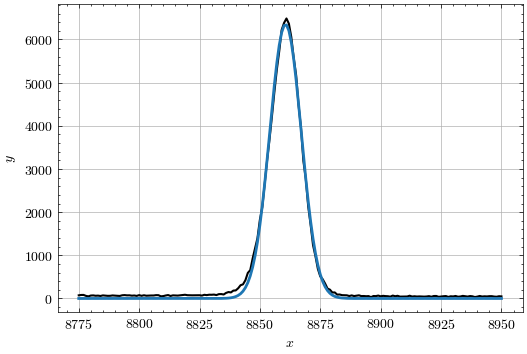

In [ ]:
spectrum_1.plot_fit_overlay(x_min=8775, x_max=8950)

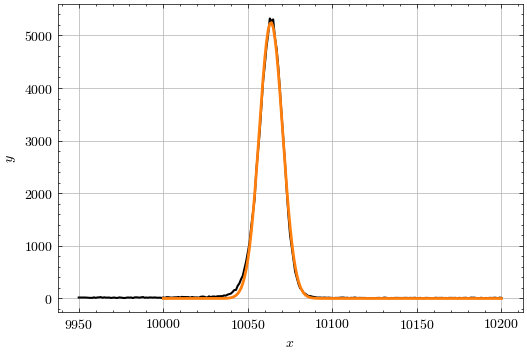

In [ ]:
spectrum_1.plot_fit_overlay(x_min=9950, x_max=10200) # es wird immer nur den Bereich geplottet, der auch gefittet wurde

Zusammen 

In [ ]:
# Auch möglich zu exportieren, plot eigenschaften ändern etc

Overlay plot saved to fit_results_plot.pdf


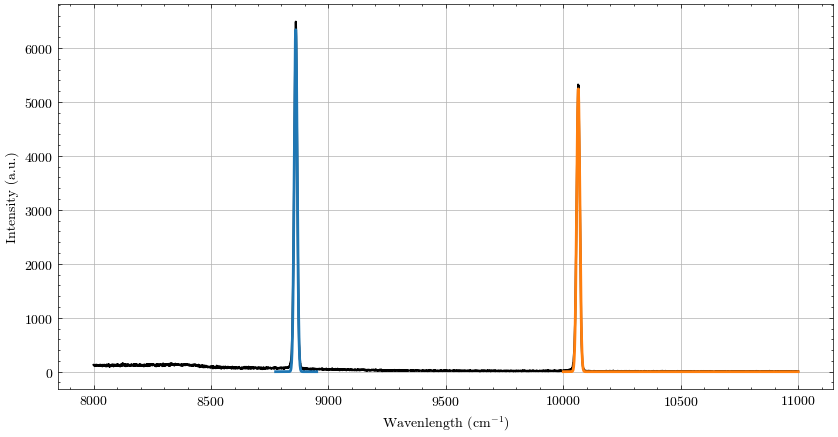

In [ ]:
spectrum_1.plot_fit_overlay(x_min=8000, x_max=11000, xlabel='Wavenlength (cm$^{-1}$)', ylabel='Intensity (a.u.)', dpi=1000, figsize=(10, 5), save_path="fit_results_plot.pdf")

## Ergbenisse Exportieren:

In [ ]:
spectrum_1.export_fitted_peaks('fit_results_1.txt')

Fitted peak data exported to fit_results_1.txt


# Zweites Beispiel mit komplexeren Peaks

In [ ]:
spectrum_2 = Spectrum('na_cs.txt')

Spectrum loaded from na_cs.txt using delimiter=' '.


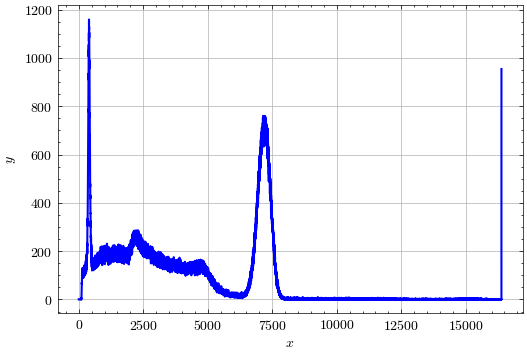

In [ ]:
spectrum_2.plot()

In [8]:
spectrum_2.plot(x_min=130, x_max=900)

NameError: name 'spectrum_2' is not defined

Fitten mit linearem Hintergrund

In [9]:
spectrum_2.fit_peaks(x_min=130, x_max=900, peak_type='gaussian', n_peaks=1, bg_type='linear', bg_coeffs=[1, 100], initial_params=[1200, 400, 50])

NameError: name 'spectrum_2' is not defined

Fit konvergiert aber Werte sind sinnlos! 

In [20]:
spectrum_2.fitted_peaks

,peak_id,type,amp,cen,wid,sigma,gamma,bg_type,bg_coeffs,x_min,x_max,d_amp,d_cen,d_wid
0,1,gaussian,-92863.65392,1071.913179,-505.548499,NaN,NaN,linear,"[1, 100]",130.0,900.0,375.143906,4.860103,2.564379


Heißt: peak entfernen mit spectrum.remove_fitted_peak(peak_id)

In [21]:
spectrum_2.remove_fitted_peak("1")

In [22]:
spectrum_2.fitted_peaks

,peak_id,type,amp,cen,wid,sigma,gamma,bg_type,bg_coeffs,x_min,x_max,d_amp,d_cen,d_wid


Jetzt: nochmal fitten mit besseren start werte für den Hintergrund

In [23]:
spectrum_2.fit_peaks(x_min=130, x_max=900, peak_type='gaussian', n_peaks=1, bg_type='linear', bg_coeffs=[100, 0.1], initial_params=[900, 420, 100])

  peak_id      type  x_min  x_max         amp         cen        wid    d_amp     d_cen     d_wid
0       2  gaussian    130    900  946.752976  400.368976  31.335601  3.47307  0.132735  0.132735

Besser!

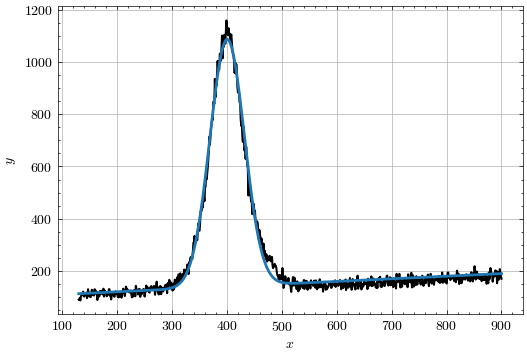

In [24]:
spectrum_2.plot_fit_overlay(x_min=130, x_max=900)

Jetzt für einen worstcase szenario

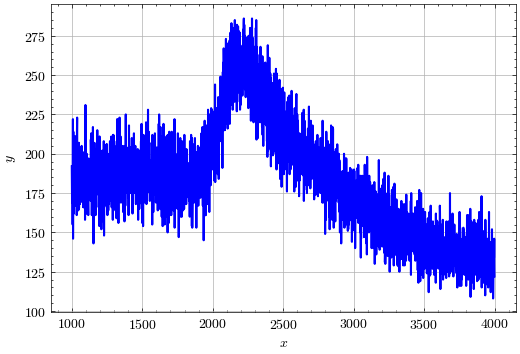

In [25]:
spectrum_2.plot(x_min=1000, x_max=4000)

Annahme: cubischer Hintergrund. 2 voigt peaks übereinander gelegt.

für kubischer hintergrund reihenfolge ist x_0, x_1, x_2, x_3

für mehrere peaks reihenfolge ist amp1, cen1, wid1, amp2, cen2, wid2,...

da voigt profil: amp1, cen1, sigma1, gamma1, amp2, cen2, sigma2, gamma2...

In [30]:
spectrum_2.fit_peaks(x_min=1000, x_max=4000, peak_type='lorentzian', n_peaks=2, bg_type='linear', bg_coeffs=[200, -0.1], initial_params=[100, 2100, 100, 100, 2100, 100])

  peak_id        type  x_min  x_max         amp          cen          wid     d_amp      d_cen      d_wid
0      4a  lorentzian   1000   4000  110.038282  2285.764436   370.557895  1.372493   3.535910   9.098601
1      4b  lorentzian   1000   4000  313.635792  4013.495459  1859.312298  1.158641  17.983751  17.209560

Overlay plot saved to fit_results_plot_2.pdf


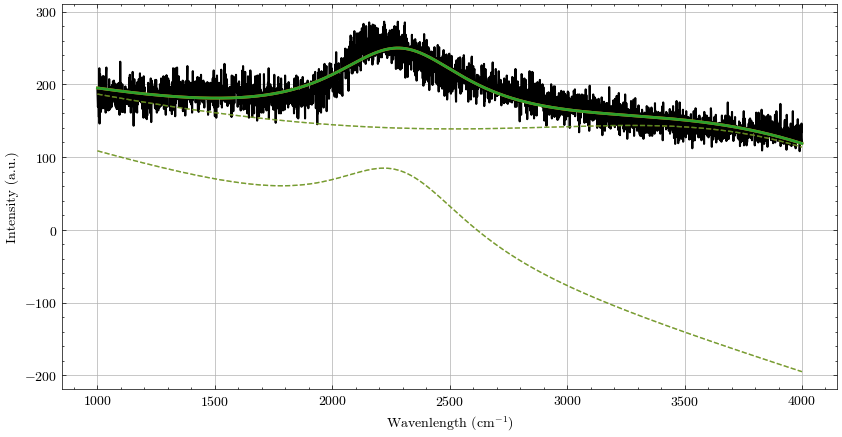

In [31]:
spectrum_2.plot_fit_overlay(x_min=1000, x_max=4000, xlabel='Wavenlength (cm$^{-1}$)', ylabel='Intensity (a.u.)', dpi=1000, figsize=(10, 5), save_path="fit_results_plot_2.pdf")